# LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기
## 감정 분석

In [5]:
# tf.keras.layers.LSTM(
#     units,
#     activation=&#x27;tanh',
#     recurrent_activation=&#x27;sigmoid',
#     use_bias=True,
#     kernel_initializer=&#x27;glorot_uniform',
#     recurrent_initializer=&#x27;orthogonal',
#     bias_initializer=&#x27;zeros',
#     unit_forget_bias=True,
#     kernel_regularizer=None,
#     recurrent_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     recurrent_constraint=None,
#     bias_constraint=None,
#     dropout=0.0,
#     recurrent_dropout=0.0,
#     seed=None,
#     return_sequences=False,
#     return_state=False,
#     go_backwards=False,
#     stateful=False,
#     unroll=False,
#     use_cudnn=&#x27;auto',
#     **kwargs
# )

>순환 신경망(RNN)

시계열 데이터 또는 순차 데이터를 처리하는 데 적합한 신경망 구조

기본적인 RNN은 긴 시퀀스의 정보를 기억하기 어렵습니다

이는 기울기 소실(vanishing gradient) 문제 때문입니다

>LSTM (Long Short-Term Memory) 네트워크

순환 신경망(RNN)의 일종

시계열 데이터나 순차 데이터 처리에 매우 유용합니다

LSTM은 장기 의존성 문제를 해결하는 데 강점을 가지고 있으며, 입력 데이터가 시간에 따라 변화하는 패턴을 학습할 수 있습니다

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)
# 길이를 지정하지 않으면 시퀀스의 길이에 따라 적절한 작업이 필요하다

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 100))
# 입력과 출력 차원: 단어의 개수, 각 단어를 100차원 벡터로 임베딩
model.add(Dropout(0.5))
# 과적합 방지 차 일정 비율의 뉴런을 랜덤하게 비활성화
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

17473536/17464789 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56

In [2]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 [==============================] - 23s 16ms/step - loss: 0.4204 - accuracy: 0.7897 - val_loss: 0.3098 - val_accuracy: 0.8694
Epoch 2/100
469/469 [==============================] - 7s 15ms/step - loss: 0.2358 - accuracy: 0.9087 - val_loss: 0.2809 - val_accuracy: 0.8816
Epoch 3/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1829 - accuracy: 0.9327 - val_loss: 0.2704 - val_accuracy: 0.8874
Epoch 4/100
469/469 [==============================] - 7s 16ms/step - loss: 0.1473 - accuracy: 0.9453 - val_loss: 0.3149 - val_accuracy: 0.8846
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 0.1152 - accuracy: 0.9594 - val_loss: 0.3047 - val_accuracy: 0.8870
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 0.3509 - accuracy: 0.8771

 Test Accuracy: 0.8771


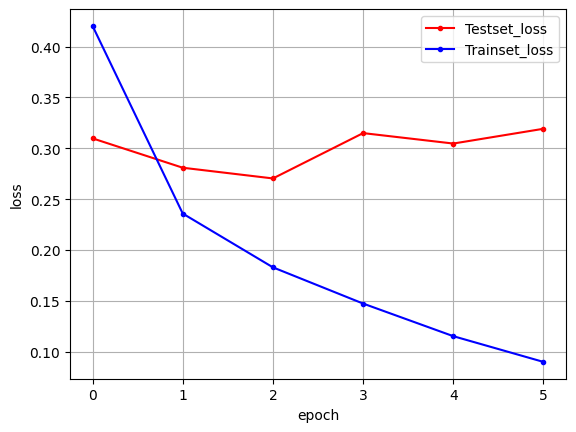

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()